In [7]:
from lib import *
import pandas as pd
import matplotlib.pyplot as plt

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

try:
    dfs = load_data_bq()
except Exception as e:
    dfs = load_data_db()
df_contratos = dfs["contract"].sort_values("created_at")
from datetime import timedelta
df_contratos['created_at'] = df_contratos['created_at'] + timedelta(days=364)
df_contratos['created_at'] = df_contratos['created_at'].dt.strftime("%Y-%m-%d %H")
#31s

Erro ao executar a query contract_canceled.sql: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/formal-purpose-354320/jobs?prettyPrint=false: Access Denied: Project formal-purpose-354320: User does not have bigquery.jobs.create permission in project formal-purpose-354320.

Location: None
Job ID: f06fdbeb-90f8-4d6e-9308-1418ec3b9a98

Erro geral: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/formal-purpose-354320/jobs?prettyPrint=false: Access Denied: Project formal-purpose-354320: User does not have bigquery.jobs.create permission in project formal-purpose-354320.

Location: None
Job ID: f06fdbeb-90f8-4d6e-9308-1418ec3b9a98

Conexão estabelecida com sucesso!


In [8]:
df_curve = pd.read_csv("curve.csv")

In [9]:
display(df_contratos.head())
display(df_curve.head())


,created_at,company_id,contract_id,city,state,freights_type,contract_days,vehicle,supply
10773,2025-03-09 12,1565,68875,Brumado,Bahia,Coleta/Entrega,22,Toco,Caçamba
8413,2025-03-09 13,547,68876,Goiânia,Goiás,Coleta/Entrega,2,Bi-Truck,Sider
10851,2025-03-09 16,288,68877,Cajamar,São Paulo,Diária,7,Carreta LS,Sider
10861,2025-03-09 16,288,68878,Maringá,Paraná,Diária,6,Carreta LS,Sider
10897,2025-03-09 18,1883,68879,Santos,São Paulo,Diária,5,Carreta LS,Porta Contêiner


,Unnamed: 0,date,hours,predito
0,0,2025-03-06 13:00:00,49245.0,1.000000
1,1,2025-03-06 14:00:00,49246.0,1.000053
2,2,2025-03-06 15:00:00,49247.0,1.000105
3,3,2025-03-06 16:00:00,49248.0,1.000158
4,4,2025-03-06 17:00:00,49249.0,1.000211


In [10]:
import pandas as pd

df1 = df_contratos

df2 = df_curve

# Converte as colunas de data para datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])
df2['date'] = pd.to_datetime(df2['date'])

# Extraia o dia (data sem horário) e a hora para cada DataFrame
df1['date_only'] = df1['created_at'].dt.date
df1['hour'] = df1['created_at'].dt.hour

df2['date_only'] = df2['date'].dt.date
df2['hour'] = df2['date'].dt.hour

# Realiza o merge. Note que você pode ajustar as colunas de merge de acordo com seu caso.
# Aqui, usamos "date_only" e "hour". Se os horários exatos não coincidirem, pode ser necessário ajustar.
merged_df = pd.merge(df1, df2[['date_only', 'hour', 'predito']], on=['date_only','hour'], how='left')

# Cria a nova coluna "weight" no df1 com o valor de "predito"
merged_df['weight'] = merged_df['predito']

# Se preferir, você pode descartar as colunas auxiliares, por exemplo:
merged_df.drop(columns=['date_only','hour','predito'], inplace=True)
display(merged_df.head())


,created_at,company_id,contract_id,city,state,freights_type,contract_days,vehicle,supply,weight
0,2025-03-09 12:00:00,1565,68875,Brumado,Bahia,Coleta/Entrega,22,Toco,Caçamba,1.003727
1,2025-03-09 13:00:00,547,68876,Goiânia,Goiás,Coleta/Entrega,2,Bi-Truck,Sider,1.003780
2,2025-03-09 16:00:00,288,68877,Cajamar,São Paulo,Diária,7,Carreta LS,Sider,1.003937
3,2025-03-09 16:00:00,288,68878,Maringá,Paraná,Diária,6,Carreta LS,Sider,1.003937
4,2025-03-09 18:00:00,1883,68879,Santos,São Paulo,Diária,5,Carreta LS,Porta Contêiner,1.004041


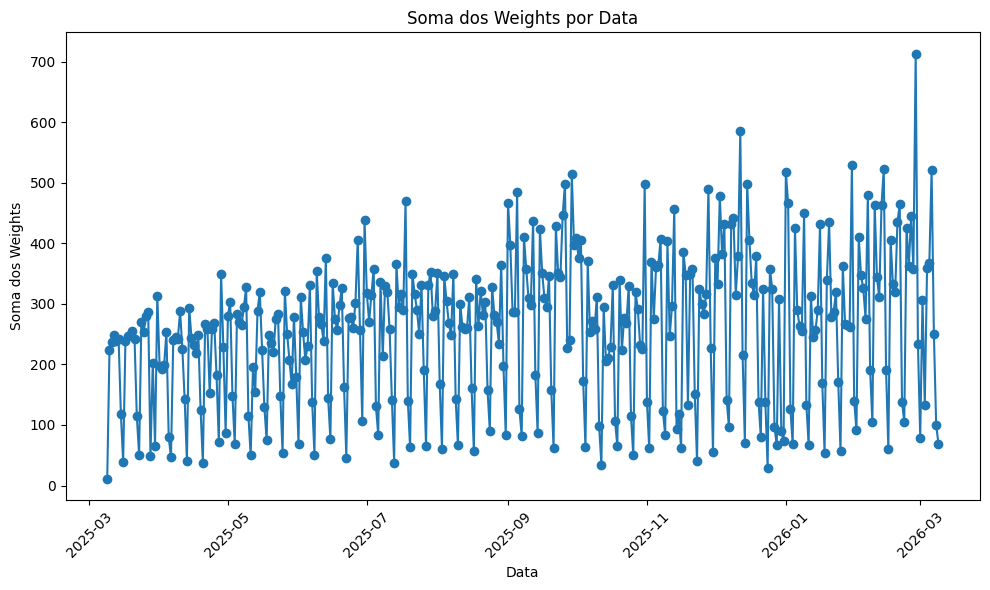

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que o seu DataFrame se chame df_resultado
# Converte a coluna created_at para datetime, caso ainda não esteja:
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])

# Agrupar por data (apenas a parte da data, ignorando a hora) e somar os weights:
df_grouped = merged_df.groupby(merged_df['created_at'].dt.date)['weight'].sum().reset_index()
df_grouped.columns = ['date', 'sum_weight']

# Plotando:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['sum_weight'], marker='o')
plt.xlabel("Data")
plt.ylabel("Soma dos Weights")
plt.title("Soma dos Weights por Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


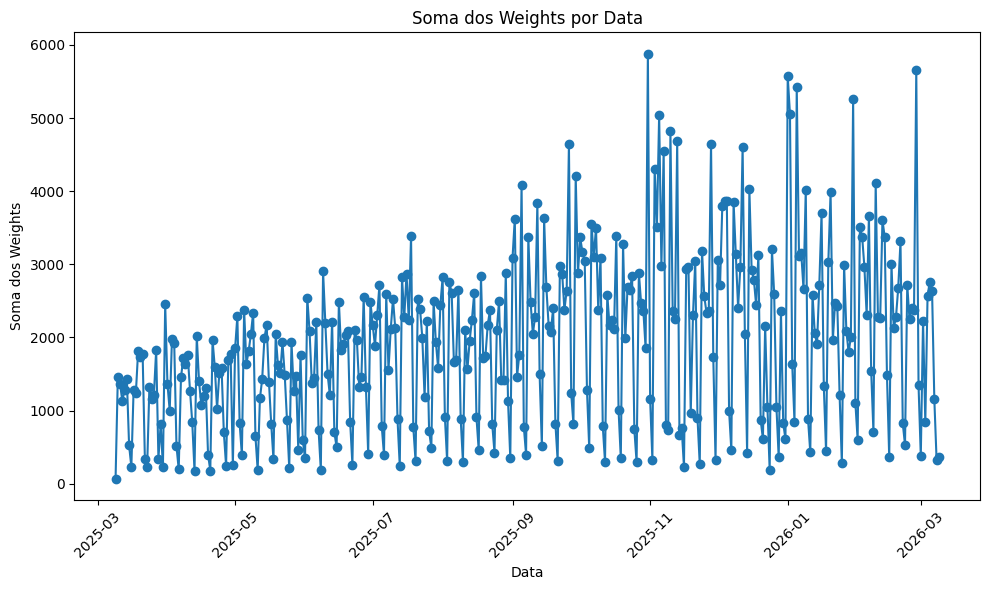

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
merged_df["weight"] = merged_df["weight"] * merged_df["contract_days"]
# Suponha que o seu DataFrame se chame df_resultado
# Converte a coluna created_at para datetime, caso ainda não esteja:
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])

# Agrupar por data (apenas a parte da data, ignorando a hora) e somar os weights:
df_grouped = merged_df.groupby(merged_df['created_at'].dt.date)['weight'].sum().reset_index()
df_grouped.columns = ['date', 'sum_weight']

# Plotando:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['sum_weight'], marker='o')
plt.xlabel("Data")
plt.ylabel("Soma dos Weights")
plt.title("Soma dos Weights por Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
